<a href="https://colab.research.google.com/github/banteamlak1888/ML_project_2025/blob/main/DL_Ass_Part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size=25, face='Times New Roman'>🛠 Step 1: **Setup** and **Import** Packeges</font>#

In [ ]:
# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
# torchvision for MNIST dataset and transforms
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Data handling
from torch.utils.data import DataLoader, random_split
# Visualization
import matplotlib.pyplot as plt
import numpy as np
# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# <font size=25, face='Times New Roman'>🛠 Step 2: Load and Preprocess MNIST</font>

In [ ]:
# Transform: convert images to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load training data
full_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split: 80% train, 20% validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Load test data
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:11<00:00, 893kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 127kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 949kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.5MB/s]


# <font size=25, color=green face='Times New Roman'>➡️ Part A: Shallow Neural Network
</font>

# <font size=15, face='Times New Roman'>🛠 Step 3: Define Shallow Model
</font>

In [ ]:
class ShallowNN(nn.Module):
    def __init__(self):
        super(ShallowNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # One hidden layer with 128 neurons
        self.fc2 = nn.Linear(128, 10)     # Output layer (10 classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)   # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# <font size=15, face='Times New Roman'>🛠 Step 4: Train Shallow Model </font>

In [ ]:
# Initialize model, loss function, optimizer
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = ShallowNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss
train_losses, val_losses = [], []

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch [{epoch+1}/{epochs}] - Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")


Using device: cuda
Epoch [1/10] - Training Loss: 0.4185, Validation Loss: 0.2686
Epoch [2/10] - Training Loss: 0.2219, Validation Loss: 0.2107
Epoch [3/10] - Training Loss: 0.1604, Validation Loss: 0.1628
Epoch [4/10] - Training Loss: 0.1259, Validation Loss: 0.1347
Epoch [5/10] - Training Loss: 0.1030, Validation Loss: 0.1354
Epoch [6/10] - Training Loss: 0.0932, Validation Loss: 0.1186
Epoch [7/10] - Training Loss: 0.0827, Validation Loss: 0.1232
Epoch [8/10] - Training Loss: 0.0741, Validation Loss: 0.1094
Epoch [9/10] - Training Loss: 0.0674, Validation Loss: 0.1207
Epoch [10/10] - Training Loss: 0.0591, Validation Loss: 0.1132


# <font size=15, face='Times New Roman'>🛠 Step 5: Plot Loss Curves </font>




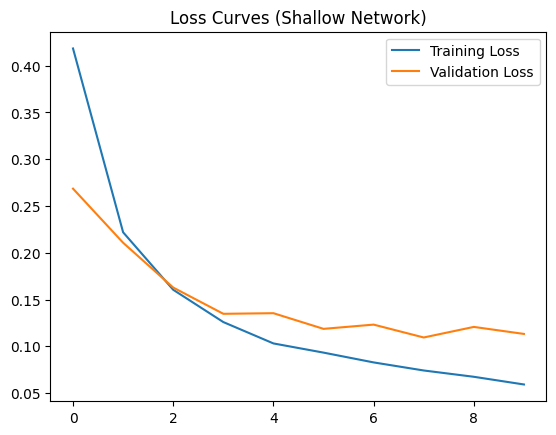

In [ ]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title("Loss Curves (Shallow Network)")
plt.show()


In [ ]:
!pip install torchview
from torchview import draw_graph

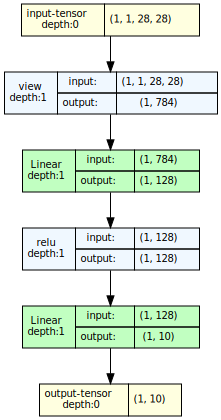

In [ ]:


model = ShallowNN().to(device)
model_graph = draw_graph(model, input_size=(1, 1, 28, 28))
model_graph.visual_graph



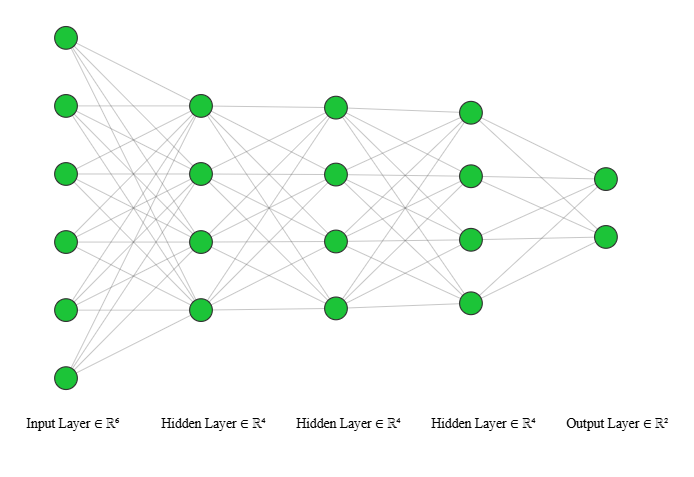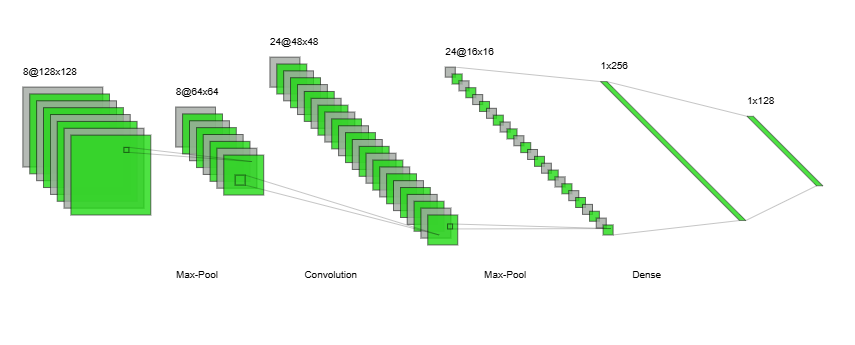

# <font size=15, face='Times New Roman'>🛠 Display Grid of Sample Images </font>

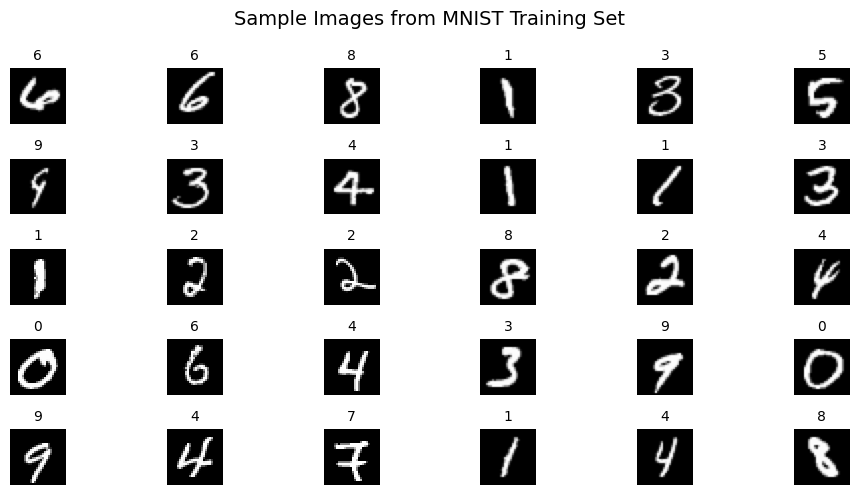

In [ ]:
import matplotlib.pyplot as plt
import torchvision

# Load a batch from training loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot a 5x6 grid (30 images)
fig, axes = plt.subplots(5, 6, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(str(labels[i].item()), fontsize=10)
    ax.axis('off')

plt.suptitle("Sample Images from MNIST Training Set", fontsize=14)
plt.tight_layout()
plt.show()


# <font size=15, face='Times New Roman'>🛠 Step 6: Evaluate and Confusion Matrix </font>

Test Accuracy (Shallow Network): 97.04%


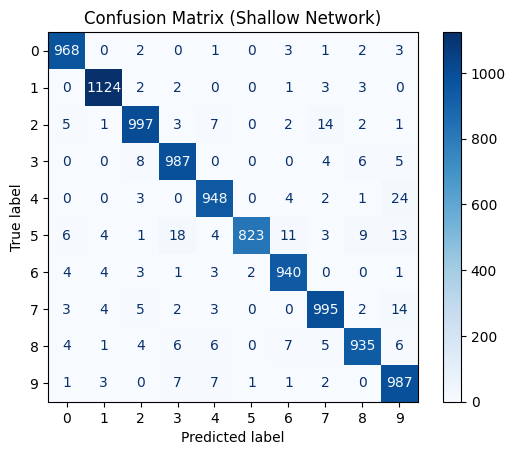

In [ ]:
# Accuracy on test set
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(f"Test Accuracy (Shallow Network): {100 * correct / total:.2f}%")

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Shallow Network)")
plt.show()
